# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print (df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Larger scale/range.  GRE spans from 220-800 whereas GPA spans 2.26-4.0

#### Question 4. Drop data points with missing data


In [6]:
df_raw1=df_raw.dropna()

In [17]:
print (df_raw1.count())
df_raw1.isnull().sum()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64


admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Is null count is now 0 and the number of rows now equal each other.

#### Question 6. Create box plots for GRE and GPA

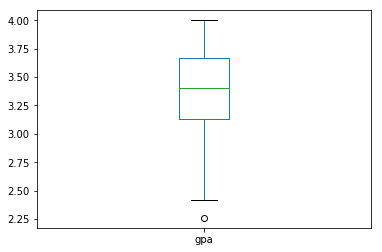

In [62]:
df_raw1.gpa.plot(kind='box')

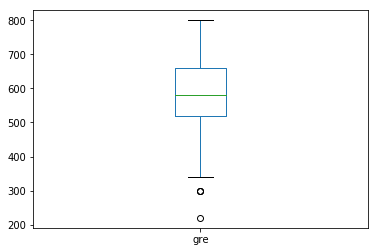

In [61]:
df_raw1.gre.plot(kind='box')

#### Question 7. What do this plots show?

Answer: GPA has one outlier, GRE has two outliers.  Also show median, first and third quartiles, min, and max.

#### Question 8. Describe each distribution 

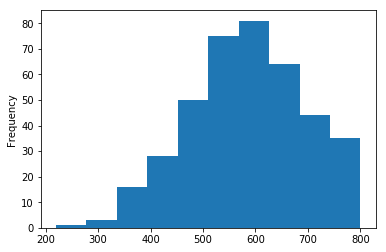

In [69]:
# plot the distribution of each variable 
df_raw1.gre.plot(kind='hist')

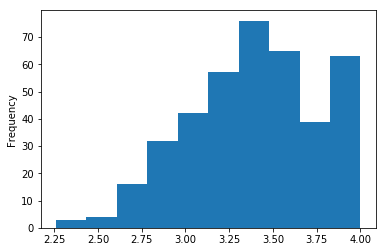

In [72]:
df_raw1.gpa.plot(kind='hist')

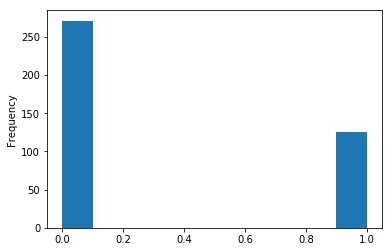

In [71]:
df_raw1.admit.plot(kind='hist')

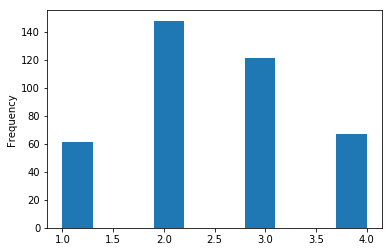

In [70]:
df_raw1.prestige.plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Mostly. GPA, GRE, and Prestige are skewed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No correction needed

#### Question 11. Which of our variables are potentially colinear? 

In [73]:
# create a correlation matrix for the data
df_raw1.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Insignificant collinearity

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Perform a logistic regression on the data set with admission as the dependent variable and prestige of undergraduate schools as a dummy independent variable and gre and gpa as continuous independent variables.  Use statsmodels for the linear regression and check the p-values in the summary table.

#### Question 14. What is your hypothesis? 

Answer: Students that attend more prestigious undergraduate schools are more likely to be admitted to UCLA graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

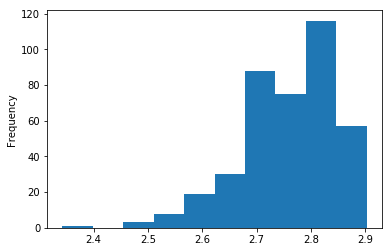

In [11]:
log_columns = ['gre', 'gpa']
log_df_raw1 = df_raw1.copy()
log_df_raw1 = log_df_raw1[log_columns].apply(np.log10)
log_df_raw1.gre.plot(kind='hist')

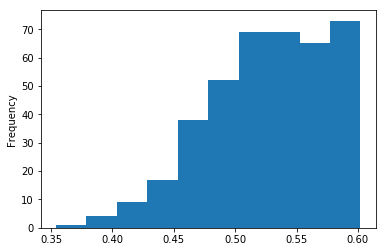

In [12]:
log_df_raw1.gpa.plot(kind='hist')

#### 3. Advanced: Impute missing data